In [1]:
def cmpr_feature_vect(feature_vector1,feature_vector2):
    
    dist = (abs(feature_vector1**2 - feature_vector2**2))**(0.5)

    for idx, val in enumerate(dist):
        if np.isnan(val):
            dist[idx] = 0

    dist = np.sum(dist)

    return dist

In [2]:
from scipy.io import loadmat
import os

dataDir = "/home/dunga/Desktop/AutoSIGN_Related_Stuff/test_train/mat_files_MYCT/"
mats = []
strings = []
for file in os.listdir( dataDir ) :
    strings.append(str(file))
    mats.append( loadmat( dataDir+file ) )
    
    
from sets import Set

string_set = Set()

for string in strings:
    #print(string)
    string_set.add(string)

/home/dunga/anaconda3/envs/AutoSIGN/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: the sets module is deprecated
  if sys.path[0] == '':


In [7]:
from scipy.io import loadmat
import numpy as np

real_mat = np.zeros((119,15,2048))
forg_mat = np.zeros((119,15,2048))

for index in range(2,119):
    
    str_real = 'real'
    str_forg = 'forg'

    name_string = '{}_{}.mat'
    real_name = name_string.format(str_real,index)
    forg_name = name_string.format(str_forg,index)
    
    if real_name in string_set:
        features_real = loadmat(dataDir+real_name)['features']
        features_forg = loadmat(dataDir+forg_name)['features']
        
        real_mat[index] = features_real
        forg_mat[index] = features_forg

In [8]:
empty_array = np.zeros((1,2048))

distance_forg = []

for index in range(2,119):   
    if (real_mat[index][1] != empty_array).any():
        print(index)
        for index_2 in range(1,15):
            for index_3 in range(1,15):
                    dist = cmpr_feature_vect(forg_mat[index][index_3],real_mat[index][index_2])
                    distance_forg.append(dist)

2
3
5
8
10
13
14
17
18
19
20
21
23
24
26
27
29
31
32
33
35
36
37
40
44
45
46
47
48
49
50
52
54
55
57
58
60
62
63
66
67
68
72
73
74
75
76
77
78
79
80
81
87
89
92
93
96
97
98
99
100
102
105
107
108
109
111
112
113
114
115
116
117
118


In [9]:
distance_same = []

for index in range(2,119):
    if (real_mat[index][1] != empty_array).any():
        print(index)
        for index_2 in range(1,15):
            for index_3 in range(1,15):
                if (index_2!=index_3):
                    dist = cmpr_feature_vect(real_mat[index][index_3],real_mat[index][index_2])
                    distance_same.append(dist)

2
3
5
8
10
13
14
17
18
19
20
21
23
24
26
27
29
31
32
33
35
36
37
40
44
45
46
47
48
49
50
52
54
55
57
58
60
62
63
66
67
68
72
73
74
75
76
77
78
79
80
81
87
89
92
93
96
97
98
99
100
102
105
107
108
109
111
112
113
114
115
116
117
118


In [11]:
distance_diff = []

for index in range(2,119):
    if (real_mat[index][1] != empty_array).any():
        print(index)
        for index_2 in range(2,119):
            if (real_mat[index_2][1] != empty_array).any():
                if (index_2!=index):
                    num = np.random.randint(1,14,2)
                    dist = cmpr_feature_vect(real_mat[index][num[0]],real_mat[index_2][num[1]])
                    distance_diff.append(dist)

2
3
5
8
10
13
14
17
18
19
20
21
23
24
26
27
29
31
32
33
35
36
37
40
44
45
46
47
48
49
50
52
54
55
57
58
60
62
63
66
67
68
72
73
74
75
76
77
78
79
80
81
87
89
92
93
96
97
98
99
100
102
105
107
108
109
111
112
113
114
115
116
117
118


In [12]:
np.shape(distance_same)
dist_same = np.array(distance_same)
print(dist_same.max())
print(dist_same.min())
print(dist_same.mean())
print(dist_same.std())

1426.90957567
0.0
840.915104036
129.256367933


In [13]:
np.shape(distance_forg)
dist_forg = np.array(distance_forg)
print(dist_forg.max())
print(dist_forg.min())
print(dist_forg.mean())
print(dist_forg.std())

1787.21085034
666.679075577
1087.20850121
160.449404421


In [14]:
np.shape(distance_diff)
dist_diff = np.array(distance_diff)
print(dist_diff.max())
print(dist_diff.min())
print(dist_diff.mean())
print(dist_diff.std())

1927.30106607
866.162983312
1309.69259405
167.945644051


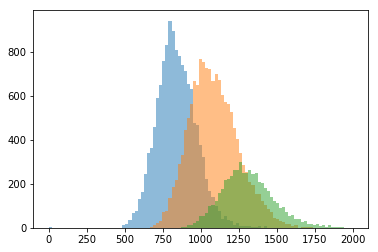

In [20]:
import numpy
import matplotlib.pyplot as plt
import plotly.plotly as py

histogram=plt.figure()

bins = numpy.linspace(0, 2000, 100)

plt.hist(dist_same, bins, alpha=0.5)
plt.hist(dist_forg, bins, alpha=0.5)
plt.hist(dist_diff, bins, alpha=0.5)
plt.show()